In [24]:
#coding:utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
# import matplotlib.font_manager
# matplotlib.font_manager._rebuild()
import warnings
warnings.filterwarnings('ignore')

In [25]:
File_Path = 'NZ_Admin_JOBS_finished.xlsx'
Reading_Engine = 'openpyxl'
pd.set_option('max_columns',100) 
pd.set_option('max_rows',500)
sns.set_style('whitegrid')
# plt.rcParams['font.sans-serif']=['SemHei']  # 设置字体为 黑体
plt.rcParams['axes.unicode_minus']=False # 显示符号
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['SemHei'],
    })
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_excel(File_Path, engine=Reading_Engine)
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head(20)

,Job_Title,Link,Orgnisation,Location,Area,Classification,Subclassification,Lo_Salary,Hi_Salary,Time_Posted
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,Private Advertiser,Bay of Plenty,Tauranga,Administration & Office Support,Office Management,59120,76931,0
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,Bay of Plenty,Tauranga,Administration & Office Support,Receptionists,41856,71887,0
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,Auckland,Unknown,Administration & Office Support,Other,68043,73752,4
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,Southland,Invercargill,Administration & Office Support,Administrative Assistants,66084,90351,0
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,Private Advertiser,Canterbury,Christchurch,Administration & Office Support,Client & Sales Administration,48334,74998,4
5,Support Officer,https://www.seek.co.nz/job/50640393?type=stand...,Ministry for Primary Industries,Northland,Whangarei,Administration & Office Support,Administrative Assistants,52362,73774,274
6,Support Officer,https://www.seek.co.nz/job/50615674?type=stand...,"Ministry of Business, Innovation and Employment",Wellington,Wellington Central,Administration & Office Support,Other,70003,88308,5
7,office administrator,https://www.seek.co.nz/job/50640166?type=stand...,Hepburn Electrical Ltd,Bay of Plenty,Rotorua,Administration & Office Support,Administrative Assistants,36940,91063,213
8,Office Administrator,https://www.seek.co.nz/job/50639248?type=stand...,Webster Holland Ltd,Bay of Plenty,Tauranga,Administration & Office Support,Administrative Assistants,54370,82342,0
9,Administration Officer,https://www.seek.co.nz/job/50629393?type=stand...,New Zealand Police,Canterbury,Unknown,Administration & Office Support,Other,32103,80177,3


## Q: Top 5 Locations with most Jobs?
### A: Auckland, Wellington, Waikato, Canterbury and Bay of Plenty have more jobs than other lacations

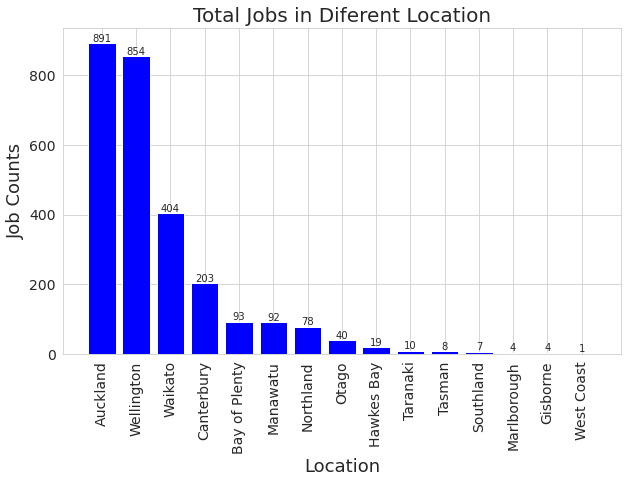

In [27]:
d1 = data.Location.value_counts()
x = d1.index
y = d1.values

plt.figure(figsize=(10,6))
plt.bar(x,y,color='b')
plt.title('Total Jobs in Diferent Location', fontsize=20)
plt.xlabel('Location', fontsize=18)
plt.ylabel('Job Counts', fontsize=18)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
for a,b in zip(x,y):
    plt.text(a, b+5, b, fontsize=10, ha='center')
plt.show()

## Q: What is the average high and low salary in each location

In [28]:
df = data[(data.Lo_Salary.str.contains(r'\d$')) & (data.Hi_Salary.str.contains(r'\d$'))]
df.Lo_Salary = df.Lo_Salary.astype('float')
df.Hi_Salary = df.Hi_Salary.astype('float')

group = df.loc[:,['Lo_Salary', 'Hi_Salary']].groupby(df.Location)
df = group.mean()

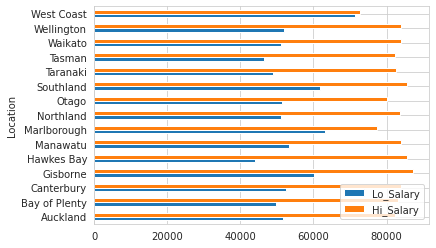

In [29]:
# 简单粗暴
df.plot(kind = 'barh', ylim = [0, df.Hi_Salary.max()+ 10000], rot=0)
plt.show()

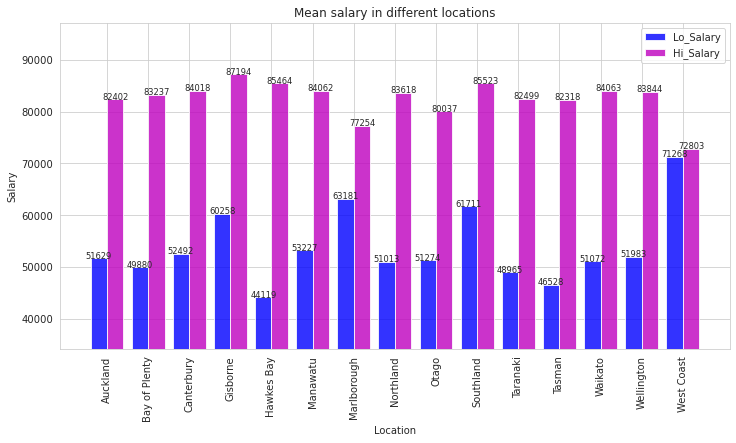

In [30]:
# matplotlib
plt.figure(figsize=(12,6))
bar_width = 0.4
index = df.index
x = range(len(index))
y1 = df.Lo_Salary
y2 = df.Hi_Salary
bar1 = plt.bar(x=[i-0.2 for i in x], height=y1, width=bar_width, alpha=0.8, color='b', label='Lo_Salary')
bar2 = plt.bar(x=[i+0.2 for i in x], height=y2, width=bar_width, alpha=0.8, color='m', label='Hi_Salary')

plt.title('Mean salary in different locations')
plt.xticks(x, index, rotation=90)
plt.xlabel('Location')
plt.ylim(df.Lo_Salary.min()-10000, df.Hi_Salary.max()+10000)
plt.ylabel('Salary')
plt.legend() # 设置图例

for bar in bar1:
    value = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, value+3, str(int(value)), ha='center', size='small')

for bar in bar2:
    value = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, value+3, str(int(value)), ha='center', size='small')    
    
plt.show()

## Q: What are the max and min salary distributions in top4 Locations where there are most jobs

In [31]:
df = data[(data.Lo_Salary.str.contains(r'\d$')) & (data.Hi_Salary.str.contains(r'\d$'))]
df.Lo_Salary = df.Lo_Salary.astype('float')
df.Hi_Salary = df.Hi_Salary.astype('float')

data1_0 = df[df.Location == 'Auckland']['Lo_Salary']
data1_1 = df[df.Location == 'Auckland']['Hi_Salary']

data2_0 = df[df.Location == 'Wellington']['Lo_Salary']
data2_1 = df[df.Location == 'Wellington']['Hi_Salary']

data3_0 = df[df.Location == 'Waikato']['Lo_Salary']
data3_1 = df[df.Location == 'Waikato']['Hi_Salary']

data4_0 = df[df.Location == 'Canterbury']['Lo_Salary']
data4_1 = df[df.Location == 'Canterbury']['Hi_Salary']


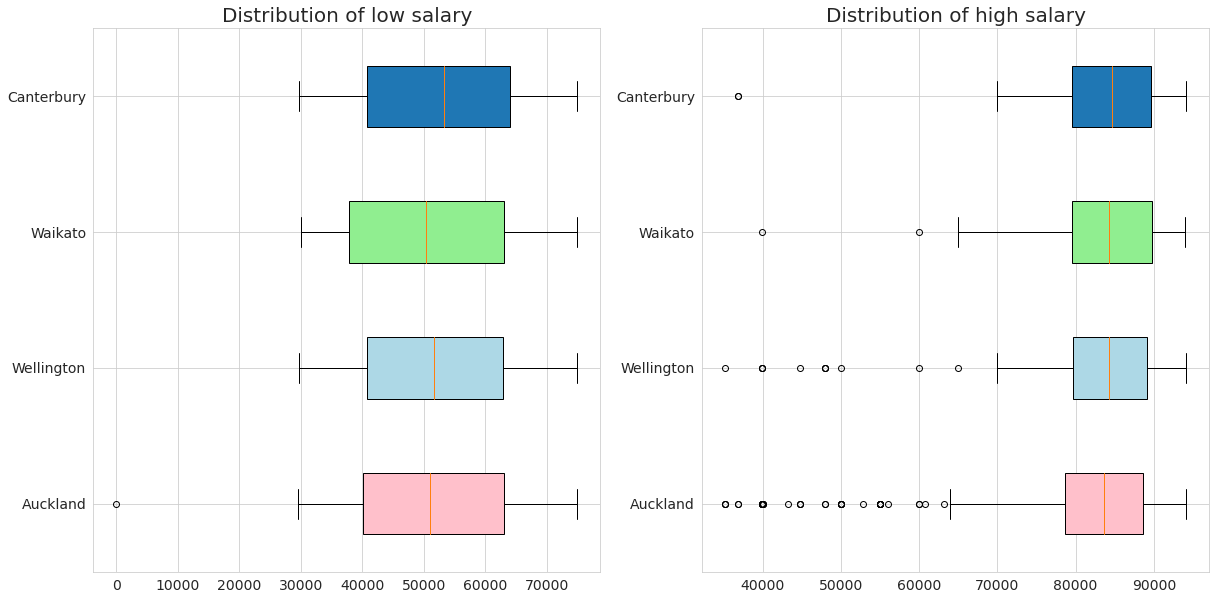

In [32]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
boxplot1 = ax1.boxplot([data1_0, data2_0, data3_0, data4_0], 
            labels=['Auckland', 'Wellington', 'Waikato', 'Canterbury'],
            whis=1.5, flierprops={'marker':'o', 'color':'k'},
            patch_artist=True,
            vert=False)
ax1.set_title('Distribution of low salary',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax2 = fig.add_subplot(1,2,2)
boxplot2 = ax2.boxplot([data1_1, data2_1, data3_1, data4_1], 
            labels=['Auckland', 'Wellington', 'Waikato', 'Canterbury'],
            whis=1.5, flierprops={'marker':'o', 'color':'k'},
            patch_artist=True,
            vert=False)
plt.yticks(fontsize=14)
ax2.set_title('Distribution of high salary',fontsize=20)
plt.xticks(fontsize=14)

colors = ['pink', 'lightblue', 'lightgreen']
for bp in (boxplot1, boxplot2):
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
plt.show()

## 工资频率分布双轴图 

In [33]:
df.Lo_Salary

0       59120.0
1       41856.0
2       68043.0
3       66084.0
4       48334.0
         ...   
2698    31084.0
2699    52690.0
2702    32495.0
2703    53878.0
2707    45180.0
Name: Lo_Salary, Length: 2201, dtype: float64

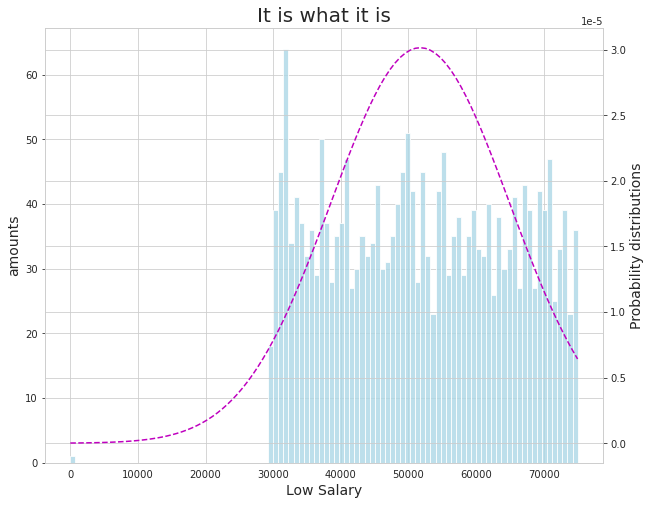

In [34]:
from scipy.stats import norm
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1)

n, bins, patches = ax1.hist(df.Lo_Salary, bins=100, color='lightblue',alpha=0.8)
ax1.set_ylabel('amounts',fontsize=14)
ax1.set_xlabel('Low Salary', fontsize=14)
ax1.set_title('It is what it is', fontsize=20)

y = norm.pdf(bins, df.Lo_Salary.mean(), df.Lo_Salary.std())
ax2 = ax1.twinx()
ax2.plot(bins, y, 'm--')
ax2.set_ylabel('Probability distributions', fontsize=14)
plt.show()